In [ ]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
!pip install linearmodels
from linearmodels.iv import IV2SLS
import math

# Fulton Fish Market Data

This file has information from 111 different days, ranging from
December 2, 1991, to May 8, 1992. There are 8 different kinds of information (variables) in the
dataset that we will look into.

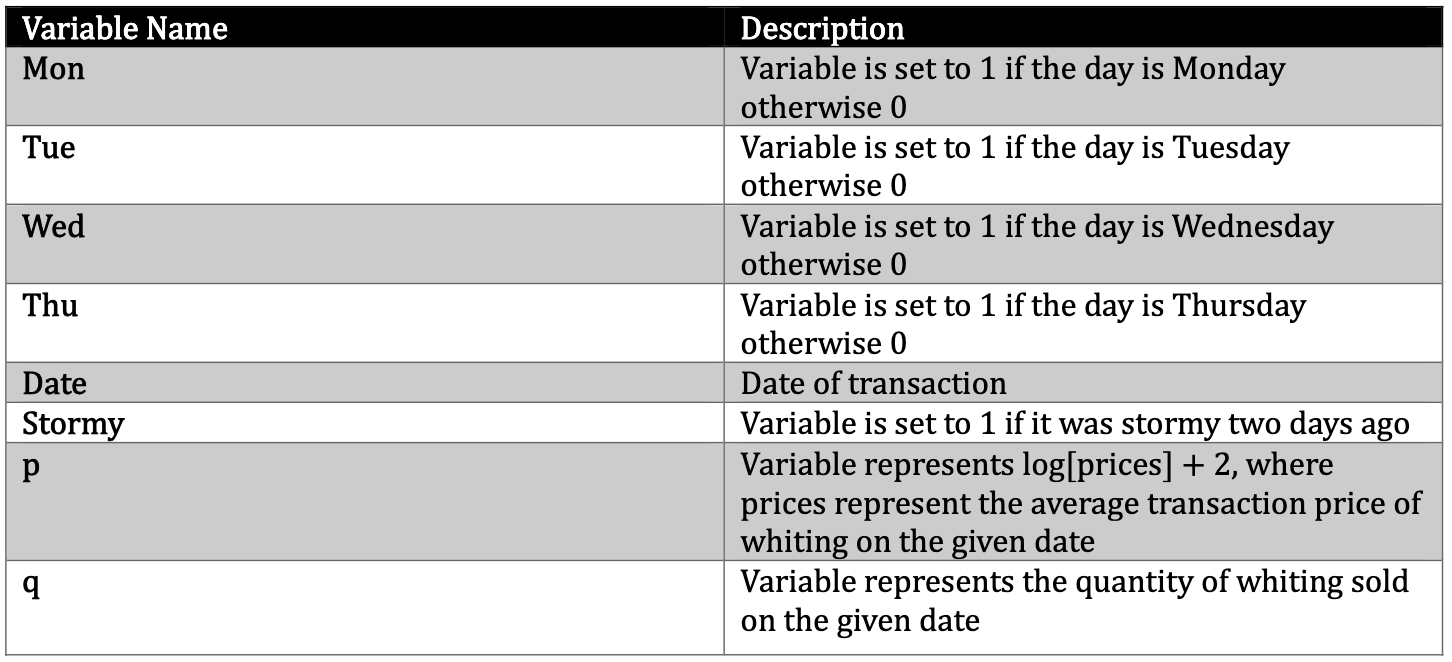

In [ ]:
# Load dataset
df_fulton = pd.read_csv('https://raw.githubusercontent.com/shoond/portfolio/datasets/fulton.csv')

df_fulton.head()

,Mon,Tue,Wed,Thu,Date,Stormy,p,q
0,1,0,0,0,1,1,1.569217,8.994421
1,0,1,0,0,2,1,2.000000,7.707063
2,0,0,1,0,3,0,2.072321,8.350194
3,0,0,0,1,4,1,2.247139,8.656955
4,0,0,0,0,5,1,2.664327,7.844241


## 1a)

First, create two scatterplots – First one with putting prices (p) on the y axis and the Date on x-axis, Second with the quantity (q) on the y axis and the Date on x-axis. What do you conclude regarding variation in prices?

> There are periodic amplitudes in pricing where starting with the 5th day, Friday Dec 6, we see the greatest transaction prices every 2 weeks or so.

> The height between the price amplitudes increases as the days progress into Summer months.

> Overall prices decline as we head into the Summer months as well.


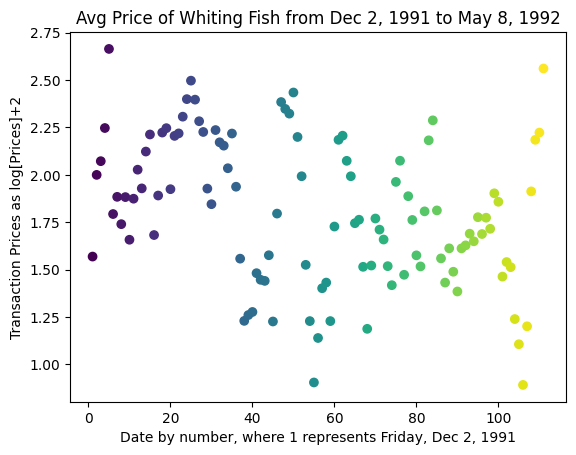

In [ ]:
# Scatter plot: Prices
x = df_fulton['Date']
y1 = df_fulton['p']
y2 = df_fulton['q']

plt.scatter(x,y1, c = x)
plt.title('Avg Price of Whiting Fish from Dec 2, 1991 to May 8, 1992')
plt.xlabel('Date by number, where 1 represents Friday, Dec 2, 1991')
plt.ylabel('Transaction Prices as log[Prices]+2')
plt.show()

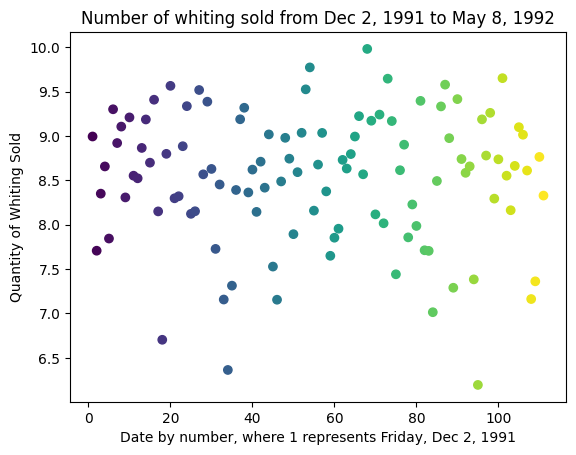

In [ ]:
# Scatter plot: Quantity
plt.scatter(x,y2, c =x)
plt.title('Number of whiting sold from Dec 2, 1991 to May 8, 1992')
plt.xlabel('Date by number, where 1 represents Friday, Dec 2, 1991')
plt.ylabel('Quantity of Whiting Sold')
plt.show()


## 1b)

What is the average price (p) and quantity (q) of fish sold on each weekday (Mon-Thu)?
> Average Price on Weekdays...
* Monday: 1.747336138095238
* Tuesday: 1.7925730652173912
* Wednesday: 1.7989470571428574
* Thursday: 1.8683068652173913

>Average Quantitity sold on Weekdays...
* Monday: 8.763345333333334
* Tuesday: 8.207339130434784
* Wednesday: 8.164622285714286
* Thursday: 8.762598130434782



On which day are fish sold for highest price?
> Average prices are greatest on Thursdays.

Can you provide any potential explanation for that.
> Strong demand and customer traffic provides assurance to sellers that they can inflate the price and make strong revenue.

> Customers looking to make a nice meal for the weekend may contend with high prices either because they don't know or care about sale prices of other weekdays.

In [ ]:
#Slice dataset into respective weekdays.
mon = df_fulton[df_fulton['Mon'] == 1]
tue = df_fulton[df_fulton['Tue'] == 1]
wed = df_fulton[df_fulton['Wed'] == 1]
thu = df_fulton[df_fulton['Thu'] == 1]

In [ ]:
#Find average price amongst weekdays.
print('Average Price on Weekdays...','Monday:', mon.p.mean(),
      'Tuesday:',tue.p.mean(),
    'Wednesday:',wed.p.mean(),
    'Thursday:',thu.p.mean())

Average Price on Weekdays... Monday: 1.747336138095238 Tuesday: 1.7925730652173912 Wednesday: 1.7989470571428574 Thursday: 1.8683068652173913


In [ ]:
#Find highest average quantity sold amongst weekdays.
print('Average Quantitity sold on Weekdays...','Monday:', mon.q.mean(),
      'Tuesday:',tue.q.mean(),
    'Wednesday:',wed.q.mean(),
    'Thursday:',thu.q.mean())

Average Quantitity sold on Weekdays... Monday: 8.763345333333334 Tuesday: 8.207339130434784 Wednesday: 8.164622285714286 Thursday: 8.762598130434782


##2)

Build a linear regression model to predict quantity (q), using all of the other variables (except “Stormy” and “Date” variable).

a) What is the linear regression equation produced by your model?
> Quantity = 9.7320 + 0.0143(Mon) - 0.5162(Tue) - 0.5554(Wed) +0.0816(Thu) -0.5625(p)

b) Evaluate the quality of your model. What is the R^2 value? Which independent variables are
significant?
> R^2 = 0.220

> Tue, Wed, and p are significant according to OLS.


c) What is the coefficient of price (p)? Can we use this coefficient to estimate the effect of change in prices on quantity (q)? Explain your reasoning?
> Coefficient of price (p) = -0.5625

> This implies that price is inversely correlated with quantity of whiting sales.

> This model describes the overall declining price trend from Winter to Summer months for Fulton market. I would not use this ols model since R^2 is very low. The inverse correlation between price (p) and quantity (q), does not make sense. Inuitively, I would think if quantity of fish sold increases, a seller would increase the price of the sale in order to generate profit.

In [ ]:
# Run OLS
ols = smf.ols('q ~ Mon+Tue+Wed+Thu+p', data=df_fulton)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.940
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.08e-05
Time:                        06:53:27   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7320      0.336     28.936      0.0

# 3)

Let us now look at estimating the causal effect of price (p) on quantity (q).

a) Graddy (1995) proposed the use of two-day lagged weather as an instrument for prices (p).
Justify why this could be a good instrument. (Note an instrument needs to satisfy two properties.)
> Variations in weather have a definitive impact on consumer behavior, supply chains, and pricing but weather in itself should not influence the quantity of fish sold at time of transaction.


b) Is there any way in which this instrument could correlate directly with the quantity of fish sold on a day. If yes explain how?
> Perhaps when it was stormy two-days prior it was difficult to catch fish thus less supply at the markets.

> Whiting is commonly prepared breaded and fried as "Fish and Chips." Perhaps consumers feel the urge to have comfort food a few days after a storm to relieve some anxiety or depression after a somber weather event.

c) Now run an iv regression in python using IV2SLS function with the variable “Stormy” as an
instrumental variable for price (p). Note, “Stormy” is set to 1 if it was stormy two days ago
and is 0 otherwise.
> See cell below

d) In which direction did the coefficient of price (p) change? Is this expected? Explain.
> price (p) is more inversely correlated to quantity (q)

> The change was somewhat expected. I would expect inclement weather would have negative effects on prices of fish due to low customer demand.

e) Write down the updated linear regression equation (as in 2 a) using the coefficients from the instrumental variable regression.
> Quantity = 10.745 - 0.0254(Mon) - 0.5308(Tue) - 0.5664(Wed) + 0.1093(Thu) - 1.1194(p)

In [ ]:
#Run Instrument Variable Regression from linearmodels
# Endog = price (p)
# Instrument = Stormy
ivr = IV2SLS.from_formula('q ~ 1+Mon+Tue+Wed+Thu+[p ~ Stormy]', data=df_fulton)
ivr_result = ivr.fit()
print(ivr_result)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                      q   R-squared:                      0.1391
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0981
No. Observations:                 111   F-statistic:                    24.946
Date:                Mon, Dec 11 2023   P-value (F-stat)                0.0001
Time:                        06:53:27   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      10.745     0.7860     13.671     0.0000      9.2043      12.285
Mon           -0.0254     0.2154    -0.1179     0.90

# 4)

Let us now look at calculating optimal fish price for each day of the week.

a) Assign the value “Mon” = 1 and 0 for the rest of the days. Set the value of p = 0.1. Calculate the quantity using the linear regression model from question 3e. Then report the revenue a seller would make at this price point on Monday.
> Quantity = 10.6

> Monday's revenue is $1.64

b) Using np.arange, create a list of prices starting from 0, ending at 6, with an increment of 0.01. Calculate the revenue for each price value on the list.
> Revenue range is [ 0.        1.060766  2.099144  3.115134  4.108736  5.07995   6.028776
  6.955214  7.859264  8.740926  9.6002   10.437086 11.251584 12.043694
 12.813416 13.56075  14.285696 14.988254 15.668424 16.326206 16.9616
 17.574606 18.165224 18.733454 19.279296 19.80275  20.303816 20.782494
 21.238784 21.672686 22.0842   22.473326 22.840064 23.184414 23.506376
 23.80595  24.083136 24.337934 24.570344 24.780366 24.968    25.133246
 25.276104 25.396574 25.494656 25.57035  25.623656 25.654574 25.663104
 25.649246 25.613    25.554366 25.473344 25.369934 25.244136 25.09595
 24.925376 24.732414 24.517064 24.279326 24.0192  ]

c) Plot these prices and revenues. Create a scatter plot with revenue on the y-axis and the
corresponding price on the x-axis. What price do you think sellers should set on a Monday based on this plot?
> The optimal revenue $25.66 occurs when price is set to 4.8 on Mondays

d) Repeat this exercise for other days (Tue, Wed, and Thu).
> The optimal revenue $23.30 occurs when price is set to 4.60 on Tuesdays

> The optimal revenue $23.13 occurs when price is set to 4.5 on Wednesdays

> The optimal revenue $26.31 occurs when price is set to 4.8 on Thursdays

In [ ]:
#Calculate quantity of fish sold on monday using IVR result.
# Quantity = 10.745 - 0.0254(Mon) - 0.5308(Tue) - 0.5664(Wed) + 0.1093(Thu) - 1.1194(p)
quantity_mon = 10.745 - 0.0254*(1) - 1.1194*(0.1)
print(f'Quantity sold on Monday = {quantity_mon}')

#Calculate price given p = 0.1
#p = log(price)+2
price_mon = np.exp(0.1-2)
print(f'Price for Monday sales = {price_mon}')

#Calculate revenue
rev = quantity_mon * price_mon
print(f'Mondays revenue = ${rev}')

Quantity sold on Monday = 10.60766
Price for Monday sales = 0.14956861922263506
Mondays revenue = $1.5865730593831768


## 4b)

Using np.arange, create a list of prices starting from 0, ending at 6, with an increment of 0.01. Calculate the revenue for each price value on the list.

In [ ]:
#Assign prices using np.arange
prices = np.arange(0,6.1, 0.1)

#Calculate quantity to be sold on Monday
quantity_mon = 10.745 - 0.0254*(1) - 1.1194*(prices)

#Calculate revenue on this range
rev_mon = (quantity_mon) * prices
print(f'Revenue range is {rev_mon}')

Revenue range is [ 0.        1.060766  2.099144  3.115134  4.108736  5.07995   6.028776
  6.955214  7.859264  8.740926  9.6002   10.437086 11.251584 12.043694
 12.813416 13.56075  14.285696 14.988254 15.668424 16.326206 16.9616
 17.574606 18.165224 18.733454 19.279296 19.80275  20.303816 20.782494
 21.238784 21.672686 22.0842   22.473326 22.840064 23.184414 23.506376
 23.80595  24.083136 24.337934 24.570344 24.780366 24.968    25.133246
 25.276104 25.396574 25.494656 25.57035  25.623656 25.654574 25.663104
 25.649246 25.613    25.554366 25.473344 25.369934 25.244136 25.09595
 24.925376 24.732414 24.517064 24.279326 24.0192  ]


## Monday

The optimal revenue $25.66 occurs when price is set to 4.8 on Mondays

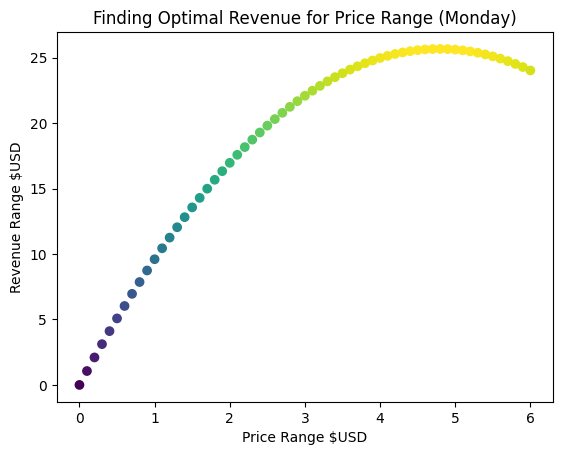

The optimal revenue $25.663104 occurs when price is set to 4.800000000000001 on Mondays


In [ ]:
#Scatter plot Monday
#x-axis = prices
#y-axis = rev_

plt.scatter(x = prices, y = rev_mon, c= rev_mon)
plt.xlabel('Price Range $USD')
plt.ylabel('Revenue Range $USD')
plt.title('Finding Optimal Revenue for Price Range (Monday)')
plt.show()

x_max = prices[np.argmax(rev_mon)]
y_max = rev_mon.max()
print(f'The optimal revenue ${y_max} occurs when price is set to {x_max} on Mondays')

## Tuesday

The optimal revenue $23.30 occurs when price is set to 4.60 on Tuesdays

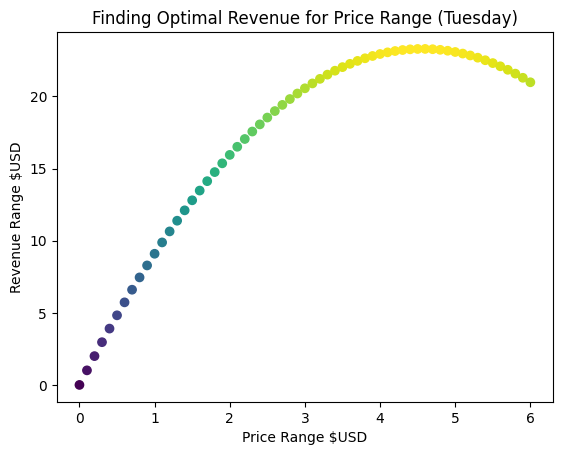

The optimal revenue $23.298816 occurs when price is set to 4.6000000000000005 on Tuesdays


In [ ]:
#Quantity to be sold on Tuesday
#Tue = 1, all other days =0
#p = prices
Tue = 1
Mon = 0
Wed = 0
Thu = 0
p = prices
quantity_tue = 10.745 - 0.0254*(Mon) - 0.5308*(Tue) - 0.5664*(Wed) + 0.1093*(Thu) - 1.1194*(p)

#Calculate revenue on this range
rev_tue = (quantity_tue) * prices

#Scatter plot Tuesday
#x-axis = prices
#y-axis = rev_

plt.scatter(x = prices, y = rev_tue, c= rev_tue)
plt.xlabel('Price Range $USD')
plt.ylabel('Revenue Range $USD')
plt.title('Finding Optimal Revenue for Price Range (Tuesday)')
plt.show()

x_max = prices[np.argmax(rev_tue)]
y_max = rev_tue.max()
print(f'The optimal revenue ${y_max} occurs when price is set to {x_max} on Tuesdays')

## Wednesday

The optimal revenue $23.13 occurs when price is set to 4.5 on Wednesdays

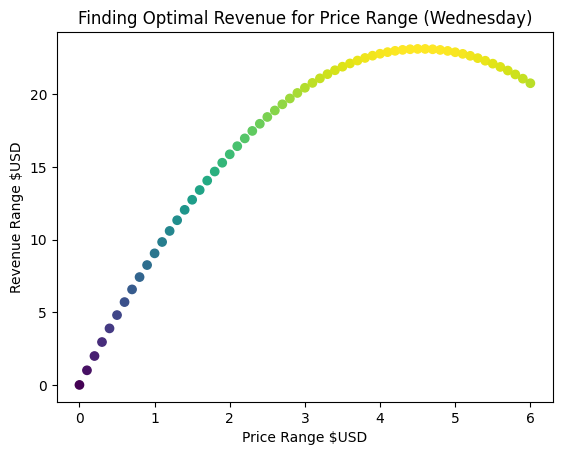

The optimal revenue $23.135849999999998 occurs when price is set to 4.5 on Wednesdays


In [ ]:
#Quantity to be sold on Wednesday
#Wed = 1, all other days =0
#p = prices
Tue = 0
Mon = 0
Wed = 1
Thu = 0
p = prices
quantity_wed = 10.745 - 0.0254*(Mon) - 0.5308*(Tue) - 0.5664*(Wed) + 0.1093*(Thu) - 1.1194*(p)

#Calculate revenue on this range
rev_wed = (quantity_wed) * prices

#Scatter plot Tuesday
#x-axis = prices
#y-axis = rev_

plt.scatter(x = prices, y = rev_wed, c= rev_wed)
plt.xlabel('Price Range $USD')
plt.ylabel('Revenue Range $USD')
plt.title('Finding Optimal Revenue for Price Range (Wednesday)')
plt.show()

x_max = prices[np.argmax(rev_wed)]
y_max = rev_wed.max()
print(f'The optimal revenue ${y_max} occurs when price is set to {x_max} on Wednesdays')

## Thursday

The optimal revenue $26.31 occurs when price is set to 4.8 on Thursdays

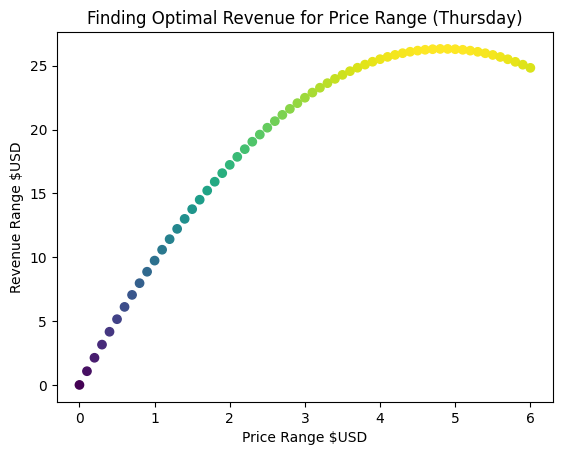

The optimal revenue $26.309663999999994 occurs when price is set to 4.800000000000001 on Thursdays


In [ ]:
#Quantity to be sold on Thursday
#Thu = 1, all other days =0
#p = prices
Tue = 0
Mon = 0
Wed = 0
Thu = 1
p = prices
quantity_thu = 10.745 - 0.0254*(Mon) - 0.5308*(Tue) - 0.5664*(Wed) + 0.1093*(Thu) - 1.1194*(p)

#Calculate revenue on this range
rev_thu = (quantity_thu) * prices

#Scatter plot Tuesday
#x-axis = prices
#y-axis = rev_

plt.scatter(x = prices, y = rev_thu, c= rev_thu)
plt.xlabel('Price Range $USD')
plt.ylabel('Revenue Range $USD')
plt.title('Finding Optimal Revenue for Price Range (Thursday)')
plt.show()

x_max = prices[np.argmax(rev_thu)]
y_max = rev_thu.max()
print(f'The optimal revenue ${y_max} occurs when price is set to {x_max} on Thursdays')